## Debiasing Techniques

When the target variable is unevenly distributed (i.e., imbalanced classes), we can create a custom bias initializer. Adjusting the last layer bias parameter in your neural network has a similar effect as changing the threshold of a binary ML algorithm, such as in logistic regression. This technique will help you to mitigate algorithmic/technical bias.

Say we want to train a binary classifier that can predict if an image depicts a wedding or not. As with the Imsitu dataset, our ‘imaginary' dataset mostly contains images of traditional American (i.e. Western) weddings. Images depicting traditional Moroccan weddings are underrepresented in the data. See data distribution below:

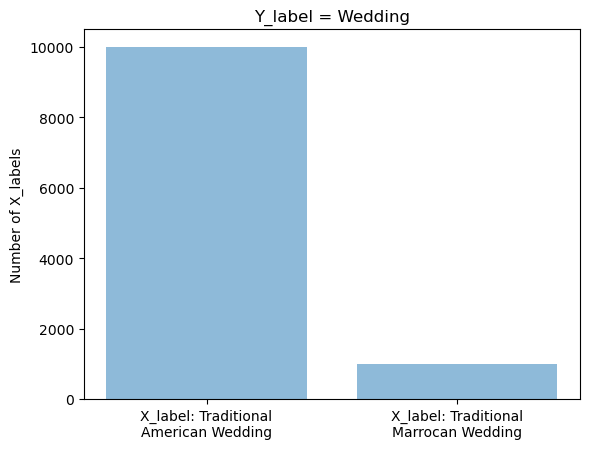

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

classes = ['X_label: Traditional American Wedding', 'X_label: Traditional Marrocan Wedding']
classes = [ '\n'.join(wrap(c, 20)) for c in classes ]
y_pos = np.arange(len(classes))
count = [10000,1000]

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, classes)
plt.ylabel('Number of X_labels')
plt.title('Y_label = Wedding')

plt.show()

With correct bias initialization during training you can mitigate (some of the) bias introduced by the unbalanced dataset: By putting emphasis on the minority class the model does not spend the first few epochs just learning that the minority examples are unlikely (i.e. learning the bias). In Keras initialize the bias with the function 'bias_initializer'.

In the case of the log loss metric, the baseline of dumb, by-chance prediction is 0.693 for a balanced dataset. This number is obtained by predicting the prevalance or p, and value it at p = 0.5 for any class of the binary problem:

Log Loss = -log(p) p = (1 / N)

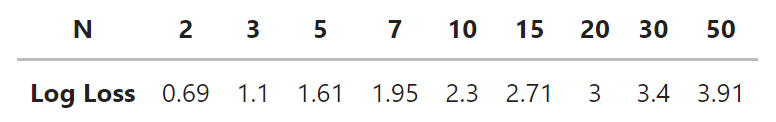

In [2]:
import math

prev_class_1 = 0.5
prev_class_2 = 0.5
dumb_baseline = 0.5

log_loss = - prev_class_1 * (math.log(dumb_baseline)) - prev_class_2 * (math.log(dumb_baseline))

#OR

#N = 2

#log_loss = -(math.log(1 / N))

print(log_loss)

0.6931471805599453


The baseline of dumb, by-chance prediction value gets increasingly smaller when the data becomes more and more unbalanced. For example, a log loss value of 0.5 with p = 0.1 (i.e. prevalance of traditional Moroccan wedding labels) indicates that the model is performing poorly.

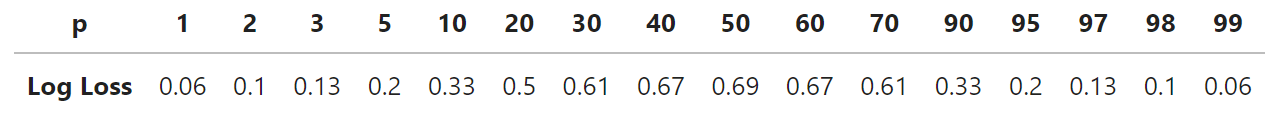

A correct dumb baseline for this particular dataset would be around:

In [3]:
import math

prev_minority_class = 0.1
prev_majority_class = 0.9

log_loss = - prev_minority_class * (math.log(prev_minority_class)) - prev_majority_class * (math.log(prev_majority_class))

print(log_loss)

0.3250829733914482


If you set the initial bias properly (in the last dense layer of your network), the model is likely to provide more reasonable initial guesses. Code example:

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [5]:
correct_bias = np.log([prev_minority_class/prev_majority_class]) #Count of X_labels: Traditional American wedding, and traditional Moroccan wedding.

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', bias_initializer=correct_bias))

NameError: name 'train_data' is not defined